# Challenge: Bear1 - Data Investigation

In the rapidly evolving field of AI security, the ability to scrutinize and interpret data is indispensable. Whether it's identifying potential security threats, understanding anomalous behavior, or uncovering hidden patterns, the insights gained from data investigation are pivotal in developing robust AI systems that are secure and resilient against adversarial attacks.

This challenge is crafted to introduce you to the world of offensive AI security through a hands-on approach. By participating, you will:

- **Gain practical experience with pandas**, a powerful Python library for data analysis, enabling you to manipulate and explore datasets efficiently.
- **Learn basic techniques for data manipulation and analysis** that are essential in identifying vulnerabilities and potential threats within datasets.
- **Discover how to extract hidden information from data**—a skill critical in many aspects of cybersecurity and AI security research.
Whether you're a beginner eager to dive into the world of data analysis and AI security, or an experienced practitioner looking to sharpen your skills, this challenge offers valuable insights and techniques. Armed with the dataset provided, your task is to unveil a hidden word, employing your newfound skills in data manipulation and analysis with pandas.

If this is your first time using pandas there are many resources out there to get started. You can start with a few here:
- Official pandas documentation: https://pandas.pydata.org/docs/getting_started/index.html
- Youtube tutorial https://www.youtube.com/watch?v=_Eb0utIRdkw

## Challenge Objective

Lets take a look at the problem statement from the challenge as it is written:

*This dataset contains historic records of the local bear population. The path to the flag is revealed by understanding the unique traits of each bear at their most expressive moments. Can you use your pandas skills to reveal the flag?*

*The flag format is {WORD}, where WORD is what you will uncover. You will send this WORD to the score api to recieve the flag. Pay close attention to the details in your dataset and think creatively about how to interpret them.*

We are provided a dataset that should be used for this challenge. It is provided in CSV format.

To successfully navigate this challenge we must do some data analysis. We will tackle this in the following steps:

1. **Understanding the Data**: Utilize pandas to load and get familiar with the dataset.
2. **Exploratory Data Analysis (EDA)**: Perform an exploratory analysis on each column in the dataset, uncovering patterns, distributions, and unique traits.
3. **Sorting and Filtering**: Learn techniques for sorting and filtering the dataset to isolate relevant information.
4. **Revealing the Hidden Flag**: Synthesize our findings to identify the hidden flag within the data.

## Step 1: Setup and Downloading Data

Before diving into data analysis, you'll need to download the necessary dataset for this challenge. First, retrieve your personalized API key from the challenge platform. Replace `YOUR_API_KEY` in the code below with your actual API key.

In [1]:
CRUCIBLE_API_KEY = "hzVUEuc8pfP78HQaWJcItf7iYahhK9O3"  # Replace with your actual API key

In [2]:
import requests

artifacts = ["bear.csv"]

for artifact in artifacts:
    url = f"https://crucible.dreadnode.io/api/artifacts/bear1/{artifact}"
    headers={"Authorization": CRUCIBLE_API_KEY}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        with open(artifact, "wb") as file:
            file.write(response.content)
        print(f"{artifact} was successfully downloaded")
    else:
        print(f"Failed to download {artifact}")

bear.csv was successfully downloaded


Once the files are downloaded, you can verify the contents of bear.csv by checking the first few lines:

This will display the first 10 lines of your CSV file, which should look like this:

```
tune,bear,val
22.55263063165446,Kodiak,p
82.06112442587525,Grizzly,g
94.8957988728884,Black,Q
62.18038848300604,Panda,a
41.19384582347789,Black,L
11.232319965271387,Sun,X
85.11257757600849,Panda,R
85.69846024859997,Sloth,N
46.777891017199,Brown,o
```

In [3]:
!head bear.csv

tune,bear,val
22.55263063165446,Kodiak,p
82.06112442587525,Grizzly,g
94.8957988728884,Black,Q
62.18038848300604,Panda,a
41.19384582347789,Black,L
11.232319965271387,Sun,X
85.11257757600849,Panda,R
85.69846024859997,Sloth,N
46.777891017199,Brown,o


## Loading in Our Dataset

Now, let's load the dataset into a pandas DataFrame and examine the first few rows to understand its structure better. We will use pandas' `read_csv` function for this purpose.

This code sets up your data analysis environment with pandas, NumPy, and matplotlib, and loads your CSV data into a pandas DataFrame named df. Running `df.head()` will show the first five rows of your dataset, allowing you to start familiarizing yourself with the data you will be analyzing.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For data visualization

df = pd.read_csv('bear.csv')
df.head()

,tune,bear,val
0,22.552631,Kodiak,p
1,82.061124,Grizzly,g
2,94.895799,Black,Q
3,62.180388,Panda,a
4,41.193846,Black,L


## Step 2: Understanding the Data

In this step, we will take a closer look at the dataset to understand its structure and the types of data it contains. The dataset features three columns, each representing different types of information:

- `tune`: This column contains numeric data, representing some measured attribute of the bears.
- `bear`: This column is categorical and lists types of bears.
- `val`: A column of text characters, potentially encoding information.

### Examining Data Types and Missing Values

Before diving deeper, it's important to confirm the data types and check for any missing values to ensure the integrity of our analysis.

In [5]:
# Display data types and check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tune    10000 non-null  float64
 1   bear    10000 non-null  object 
 2   val     10000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 234.5+ KB
None


### Distribution of Numeric Data

Let's visualize the distribution of the tune column to understand its range and general behavior.

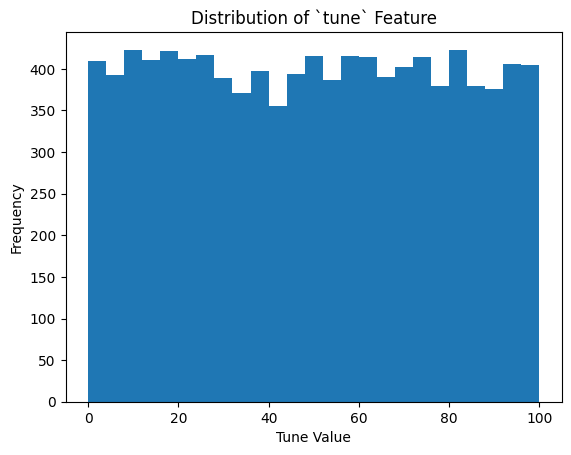

In [6]:
# Plotting the distribution of 'tune'
import matplotlib.pyplot as plt

df['tune'].plot(kind='hist', bins=25, title='Distribution of `tune` Feature')
plt.xlabel('Tune Value')
plt.ylabel('Frequency')
plt.show()

This histogram helps us see how the values in the tune column are distributed, potentially indicating different behaviors or traits of the bears based on this metric. We can see that the values are uniformly distributed between 0 and 100.

### Analyzing Categorical Data

Next, we'll explore the bear column by examining the frequency of each bear type. This can help us understand which bear types are more common in the dataset.

In [ ]:
# Plotting the frequency of bear types
df['bear'].value_counts().plot(kind='barh', title='Frequency of Bear Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Bear Type')
plt.show()

This bar chart provides a clear view of how many times each bear type appears, highlighting any significant imbalances in bear representation. We can see that while there are some differences in the number of rows for each bear type, no one bear appears to be significantly over or under represented.

## Exploring Text Data

Finally, let's explore the val column, which contains text characters. We'll look at the unique characters present, which might be crucial for uncovering hidden patterns later. Because we know the flag will be a text string, this column may be important in solving the puzzle.

In [ ]:
# Displaying unique characters in the 'val' column
unique_values = df['val'].unique()
print("Unique characters in the 'val' column:", unique_values)

Understanding these characters and their distribution might be key in decoding any hidden messages or flags in the dataset.



## Step 3: Sorting and Filtering the data.

In data analysis, especially in challenges like this, sorting and filtering data are essential techniques to uncover hidden information or patterns. The clues suggest that the key to decoding the flag lies in manipulating the dataset in specific ways. Let’s explore how to use some of pandas' powerful functionalities, such as `sort_values` and `groupby`, to potentially reveal the hidden flag.

### Understanding Groupby Aggregations on a Pandas DataFrame

The `groupby` method is incredibly useful for segmenting data into groups and applying a function to each group independently. This can help in summarizing or analyzing data separately within subsets defined by one or more attributes.

In [ ]:
# Group by the bear type and aggregate to the average `tune` value
mean_tunes = df.groupby('bear')['tune'].mean()
print(mean_tunes)

This code groups the data by bear type and calculates the average tune value for each type. Such aggregations can reveal differences in measurements across categories that might be significant in understanding the data better or even solving the challenge.

### Sorting the Pandas DataFrame

Sorting data can highlight the highest or lowest values in a dataset, or bring out the most significant entries according to a particular column.

In [ ]:
# Sorting the DataFrame by 'tune' in descending order to see the top values
top_tunes = df.sort_values('tune').head(5)
print(top_tunes)

This snippet sorts the entire DataFrame based on the tune column in descending order and displays the top 5 records. Sorting is particularly useful when you're looking for outliers or specific records that stand out in the dataset, which could be crucial in challenges like this where a single record might contain the key to the flag.

### Filtering Data for Specific Conditions
Sometimes, the clue to solving a challenge lies in isolating data based on specific conditions. Pandas allows for complex querying and filtering operations that can be pivotal in such scenarios.

In [ ]:
# Filtering to find entries where 'tune' values are above a certain threshold
high_tune_bears = df[df['tune'] > 90]
print(high_tune_bears.head(5))

This filter operation selects records where the tune values exceed 90, possibly isolating important data points. Exploring the characteristics of these high tune entries could guide us towards the flag.

### Applying Multiple Filters

You can also apply multiple conditions to narrow down the data further.

In [ ]:
# Applying multiple conditions to find a specific subset of data
specific_bears = df[(df['tune'] > 50) & (df['bear'] == 'Kodiak')]
print(specific_bears.head(5))

This example shows how to use multiple conditions to filter the data, which can be incredibly useful when trying to decode complex patterns or requirements set forth by a challenge.

By understanding and utilizing these data manipulation techniques, you can explore various hypotheses or follow clues more effectively. Experimenting with different aggregations, sorting methods, and filters can unveil patterns that are not immediately obvious but are key to solving data-centric challenges.



## Step 4: Solving the Challenge

Now that we've familiarized ourselves with the dataset and learned how to manipulate the data using various pandas functions, it's time to apply these skills to solve the challenge and decode the hidden flag.

### Analyzing and Identifying Key Data

The clues suggest that the secret word is encoded in a unique way related to the characteristics of each bear type at specific `tune` values. We hypothesize that sorting the data by 'tune' and examining the highest values for each bear type might reveal this secret word.

In [ ]:
# Sorting the data by 'tune' in descending order to focus on the highest values
sorted_data = df.sort_values('tune', ascending=False)
sorted_data.head()

### Extracting Critical Information

Next, we utilize the `groupby` method combined with `head(1)` to capture the top entry for each bear type, which we suspect holds the parts of our hidden word.

In [ ]:
# Grouping by 'bear' type and taking the top entry for each group based on 'tune' value
top_bears = df.sort_values('tune', ascending=False).groupby('bear').head(1)
top_bears = top_bears.sort_values('bear')  # Sorting by bear type for easier visualization
print(top_bears)

### Decoding the Flag

After extracting the top entry for each bear type, we need to examine these entries closely. We suspect that the val column in these entries might hold the characters of the flag.

In [ ]:
# Extracting characters from the 'val' column
characters = top_bears['val'].tolist()
secret_word = ''.join(characters)
print("Secret Word:", secret_word)

In [ ]:
secret_word = [c for c in secret_word if c not in ['{','}',' ']]
secret_word = ''.join(secret_word)

This operation gathers all the characters from the val column of the top entries, concatenating them to form the secret word. We then need to format this word according to the flag format provided in the challenge instructions.

## Submitting Our Findings to the Endpoint

Finally, we submit the secret word to the challenge's scoring API to receive the flag. Here's how you can do this:

In [ ]:
import requests

def query(input_data):
    response = requests.post(
        "https://bear1.crucible.dreadnode.io/score",
        headers={"Authorization": CRUCIBLE_API_KEY},
        json={"data": input_data}
    )
    return response.json()

response = query(secret_word)
print(response)

## Submitting Our Flag

You should see the flag returned above the starts with `gAAAA....` congradulations! You can now submit it to the crucible website to

1. Uploading on the challenge page by clicking the "Submit Flag" button.
2. Using the code provided below to submit.

In [ ]:
response['flag']

## Well Done!

Congratulations on solving the challenge! Through this exercise, you've honed your skills in data analysis using pandas, learned to manipulate and interpret complex datasets, and applied these skills in a simulated AI security scenario. Keep practicing these techniques to further enhance your expertise in data-driven cybersecurity tasks.

# Submitting the Flag

You can use the below helper code to submit the flag.

In [ ]:
def submit_flag(flag, challenge="bear1"):
    url = "https://crucible.dreadnode.io/api/submit-flag"
    headers = {"Authorization": CRUCIBLE_API_KEY}
    payload = {"challenge": challenge, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)

In [ ]:
submit_flag()